<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/movieratingpredicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2: MOVIE RATING PREDICTION

MADE BY : CHITRARTH VASDEV

DOMAIN : DATA SCIENCE

LANGUAGE : PYTHON

MODEL : LINEAR REGRESSION


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')

# Drop rows with missing values
df = df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating'])

# top 20 categories and labeled as 'Other'
def simplify_column(df, column, top_n=20):
    top_values = df[column].value_counts().nlargest(top_n).index
    return df[column].apply(lambda x: x if x in top_values else 'Other')

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = simplify_column(df, col)

# Features and target
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Linear Regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



RMSE: 1.29
R² Score: 0.10
Predicted Rating: 6.39


In [ ]:
# Example prediction
sample = pd.DataFrame([{
    'Genre': 'Drama',
    'Director': 'Sanjay Leela Bhansali',
    'Actor 1': 'Shah Rukh Khan',
    'Actor 2': 'Aishwarya Rai',
    'Actor 3': 'Salman Khan'
}])

predicted_rating = model.predict(sample)
print(f"Predicted Rating: {predicted_rating[0]:.2f}")

Predicted Rating: 6.39


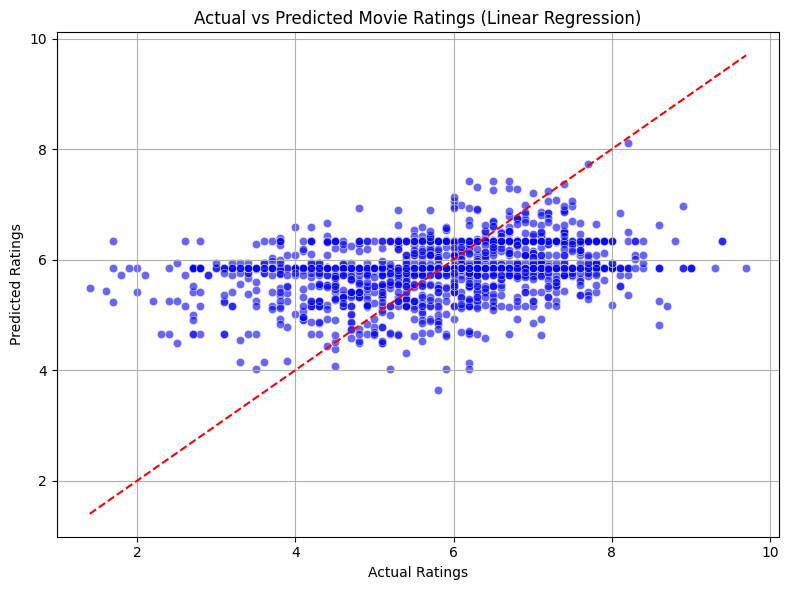

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


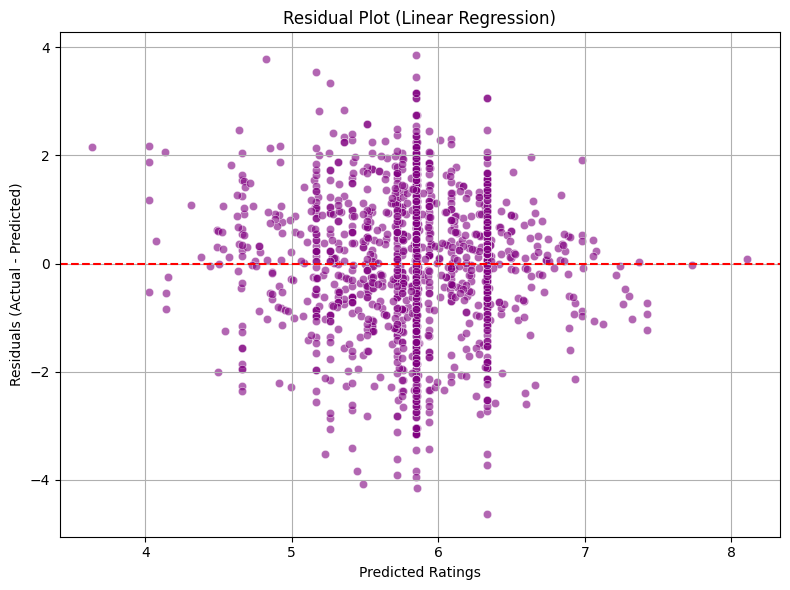

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero error
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


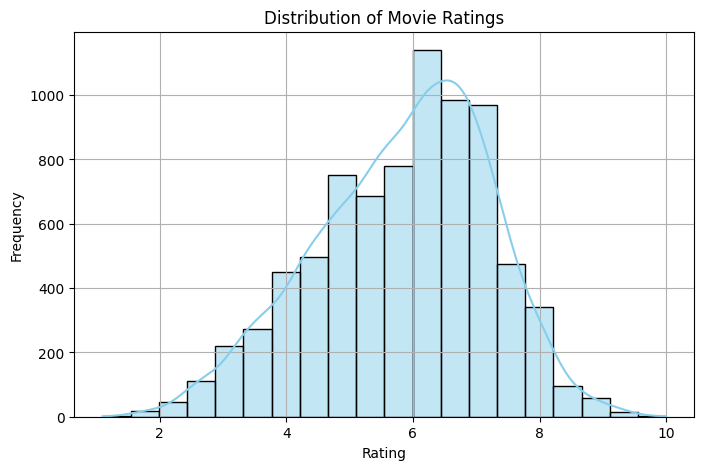

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


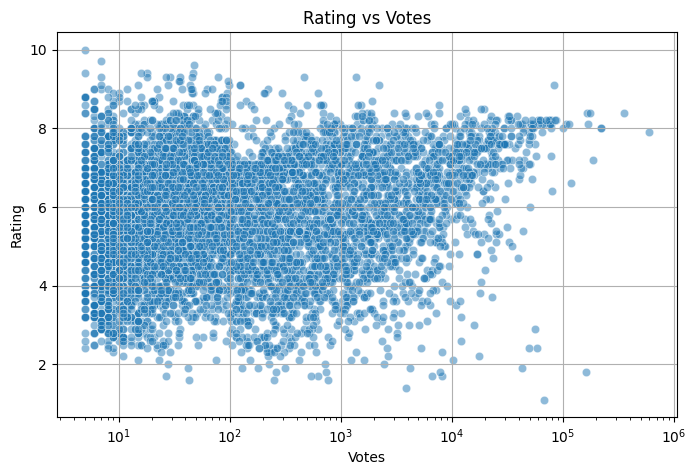

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Rating', data=df, alpha=0.5)
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # votes are skewed
plt.grid(True)
plt.show()


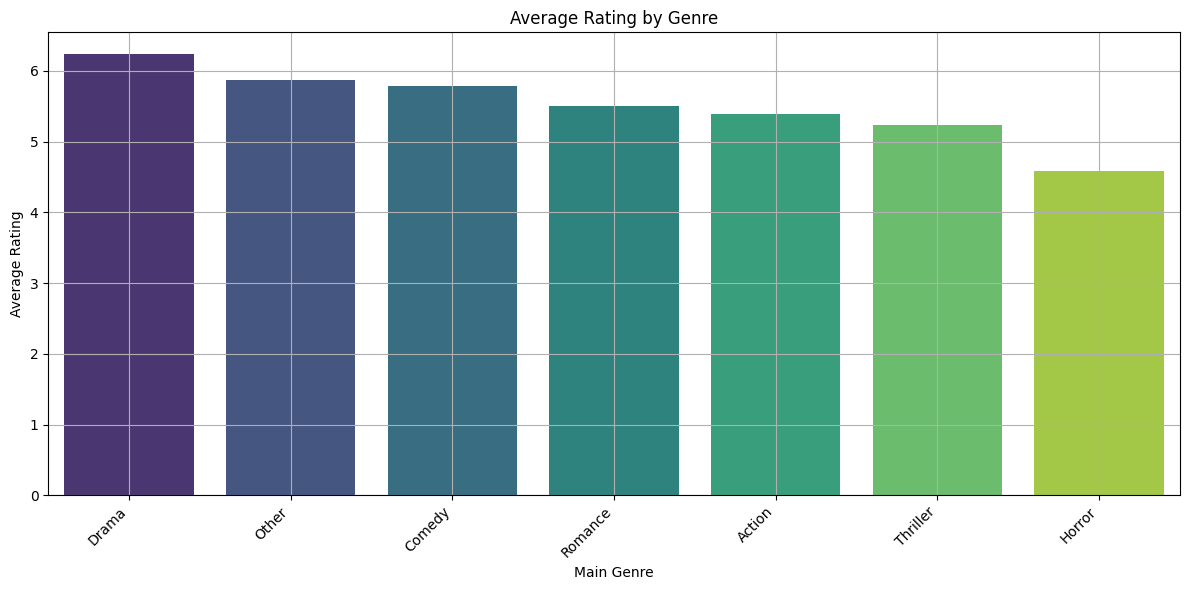

In [ ]:
plt.figure(figsize=(12, 6))
df['Main Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Calculate the average rating for each main genre
genre_avg = df.groupby('Main Genre')['Rating'].mean().sort_values(ascending=False)

# Create the bar plot using the calculated genre_avg
sns.barplot(x=genre_avg.index, y=genre_avg.values, palette='viridis', hue=genre_avg.index, legend=False)
plt.title('Average Rating by Genre')
plt.xlabel('Main Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()